# RNN

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

In [2]:
# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words
maxlen = 500
batch_size = 32

In [3]:
# Load data
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Pad sequences
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
# Define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_features, 32),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Compile model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# Train model
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 42s 251ms/step - loss: 0.6702 - accuracy: 0.5806 - val_loss: 0.6402 - val_accuracy: 0.6006
Epoch 2/10
157/157 [==============================] - 28s 179ms/step - loss: 0.4550 - accuracy: 0.7951 - val_loss: 0.4717 - val_accuracy: 0.7810
Epoch 3/10
157/157 [==============================] - 28s 179ms/step - loss: 0.3258 - accuracy: 0.8643 - val_loss: 0.3940 - val_accuracy: 0.8362
Epoch 4/10
157/157 [==============================] - 30s 188ms/step - loss: 0.2458 - accuracy: 0.9033 - val_loss: 0.3747 - val_accuracy: 0.8496
Epoch 5/10
157/157 [==============================] - 28s 180ms/step - loss: 0.1849 - accuracy: 0.9309 - val_loss: 0.5126 - val_accuracy: 0.7728
Epoch 6/10
157/157 [==============================] - 28s 177ms/step - loss: 0.1186 - accuracy: 0.9603 - val_loss: 0.4399 - val_accuracy: 0.8450
Epoch 7/10
157/157 [==============================] - 38s 241ms/step - loss: 0.0738 - accuracy: 0.9779 - val_loss: 0.6245 - val_ac

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test accuracy:', test_acc)

782/782 [==============================] - 24s 30ms/step - loss: 0.6626 - accuracy: 0.8185
Test accuracy: 0.8185200095176697


In [8]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [9]:
# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

In [13]:
# Get number of epochs
epochs = range(len(acc))
print(epochs)

range(0, 10)


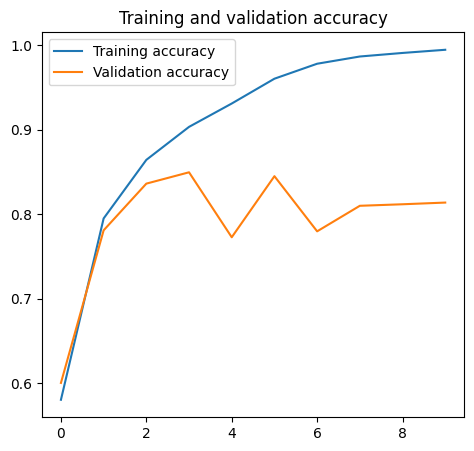

In [11]:
# Plot training and validation accuracy per epoch
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

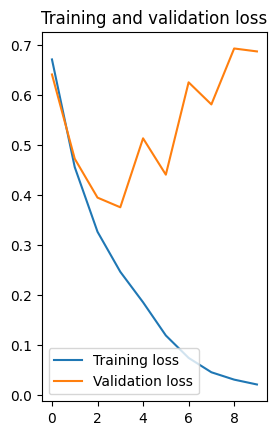

In [12]:
# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()